In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
import csv
import nltk, re
nltk.download('treebank')
nltk.download('universal_tagset')


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from datetime import datetime


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data =pd.read_csv("/content/gdrive/MyDrive/Google Colab/data_analyzed_50k.csv", on_bad_lines='skip')
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,Lemmatized,Stemmed:Sentence,Stemmed:Tokens,Stemmed_Word_Count,Positive_Word_Count,Positive_Words_%,Negative_Word_Count,Negative_Words_%,Polarity,Subjectivity
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,decide eat aware going take 2 hour beginning e...,decid eat awar go take 2 hour begin end tri mu...,"['decid', 'eat', 'awar', 'go', 'take', '2', 'h...",45,8,0.166667,3,0.062500,0.198485,0.412121
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,834,...,ive taken lot spin class year nothing compare ...,ive taken lot spin class year noth compar clas...,"['ive', 'taken', 'lot', 'spin', 'class', 'year...",84,18,0.206897,1,0.011494,0.395455,0.571212
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,340,...,family diner buffet eclectic assortment large ...,famili diner buffet eclect assort larg chicken...,"['famili', 'diner', 'buffet', 'eclect', 'assor...",39,6,0.150000,2,0.050000,0.139935,0.522294
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,243,...,wow yummy different delicious favorite lamb cu...,wow yummi differ delici favorit lamb curri kor...,"['wow', 'yummi', 'differ', 'delici', 'favorit'...",24,5,0.208333,2,0.083333,0.315152,0.733838
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,535,...,cute interior owner gave u tour upcoming patio...,cute interior owner gave u tour upcom patioroo...,"['cute', 'interior', 'owner', 'gave', 'u', 'to...",63,12,0.190476,1,0.015873,0.416234,0.490260


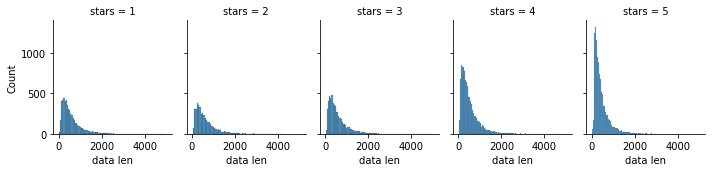

In [ ]:
g = sns.FacetGrid(data, col="stars", height=2.5, aspect=.8)
g.map(sns.histplot, "data len")

In [ ]:
nltk.download('tagsets')



[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
tagged =[]
tokens = data['Stemmed:Sentence']
nlp = spacy.load("en_core_web_sm")
for i in range(tokens.size):
  tagged = nltk.pos_tag(pd.Series(tokens[i].split(" ")))
  listToStr = ' '.join([str(elem) for elem in tagged])
  data.loc[i, 'POS'] = listToStr
  doc = nlp(tokens[i])
  count = doc.count_by(spacy.attrs.POS)
  for k,v in count.items():
      data.loc[i, doc.vocab[k].text] = v
data.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,data len,...,PRON,AUX,INTJ,PART,SCONJ,X,CCONJ,PUNCT,SYM,SPACE
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",7/7/2018 22:09,515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,1/3/2012 15:28,834,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2/5/2014 20:30,340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",1/4/2015 0:01,243,...,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,1/14/2017 20:54,535,...,1.0,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.to_csv(r'data.csv',index=False)

NameError: ignored